In [1]:
import sys
import pickle
sys.path.insert(0,'./')
import pyccl as ccl
import tracemalloc


# from importlib import reload

In [2]:
ww=np.arange(100)
for i in ww[:2]:
    print (i)

0
1


In [3]:
x={1:1,0:0}
1+ (x.get(1) or 0)

2

In [4]:
import dask
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above
#http://distributed.readthedocs.io/en/latest/_modules/distributed/worker.html
LC=LocalCluster(n_workers=10,processes=False,memory_limit='50gb',threads_per_worker=1,memory_spill_fraction=.99,)
#                memory_monitor_interval='2000ms',worker_memory_limit='50gb')
client=Client(LC)
# dask.config.set(scheduler='single-threaded')

In [5]:
client

Client Scheduler: inproc://136.152.250.183/17434/1 Dashboard: http://localhost:35427/status,Cluster Workers: 10 Cores: 10 Memory: 500.00 GB


In [6]:
client.restart()

Client Scheduler: inproc://136.152.250.183/17434/1 Dashboard: http://localhost:35427/status,Cluster Workers: 10 Cores: 10 Memory: 500.00 GB


In [7]:
from cov_3X2 import *
# from fisher import *

In [8]:
#only for python3
import importlib
reload=importlib.reload

# Lensing X Lensing Correlation function covariance

## Multiple redshift bins (Tomography)

In [9]:
from lsst_utils import *

In [10]:
import cov_utils
reload(cov_utils)
from cov_utils import *

In [11]:
import window_utils
reload(window_utils)
from window_utils import *

In [12]:
import cov_3X2
reload(cov_3X2)
from cov_3X2 import *
from wigner_transform import *

In [13]:
import hankel_transform
from astropy.io import fits
reload(hankel_transform)
from hankel_transform import *


In [14]:
cosmo_params={'h': 0.8433,
 'Omb': 0.062,
 'Omd': 0.2837-0.062,
 's8': 0.795431,
 'Om': 0.2837,
 'As': 1.685e-09,
 'Ase9': 1.685,
 'mnu': 0.0,
 'Omk': 0.0,
 'tau': 0.06,
 'ns': 0.96859,
 'w': -1,
 'wa': 0,
 'Oml': 1.-0.2837}
PS=Power_Spectra(cosmo_params=cosmo_params)
k,pk,s8=PS.camb_pk(z=[0],cosmo_params=cosmo_params,return_s8=True)
s8

0.7971166462048332

In [15]:
mnu=cosmo_h.m_nu*0
cosmo=cosmo.clone(m_nu=mnu,Ob0=cosmo_params['Omb'],Om0=cosmo_params['Om'])
cosmo_h=cosmo.clone(H0=100) #,m_nu=mnu,Ob0=cosmo_params['Omb'],Om0=cosmo_params['Om'])
ccl_cosmo = ccl.Cosmology(Omega_c=cosmo_params['Omd'], Omega_b=cosmo_params['Omb'], 
                      h=cosmo_params['h'], A_s=cosmo_params['As'], n_s=cosmo_params['ns'],)#m_nu=[0,0,0.06])

In [16]:
use_window=True
do_sample_variance=True
SSV_cov=True
tidal_SSV=True
Tri_cov=False
sigma_gamma=0.3944/sqrt(2.)  #*2**0.25

In [17]:
f_sky=.7 #3000./(4*np.pi/d2r**2)
f_sky

nside=128

In [18]:
zmin=0.3
zmax=2

z=np.linspace(0,5,200)
pzs=lsst_pz_source(z=z)
x=z<zmax
x*=z>zmin
z=z[x]
pzs=pzs[x]

ns0=26 #26+np.inf #ns=inf means shape noise is zero
nbins=1  # Number of tomographic bins
z_sigma=0.03
zs_bins=source_tomo_bins(zp=z,p_zp=pzs,ns=ns0,nz_bins=nbins,use_window=use_window,f_sky=f_sky,window_cl_fact=0,
                         ztrue_func=ztrue_given_pz_Gaussian,zp_bias=np.zeros_like(z),sigma_gamma=sigma_gamma,
                        zp_sigma=z_sigma*np.ones_like(z),nside=nside)

ng0=10 #26+np.inf #ns=inf means shape noise is zero
nlbins=1 # Number of tomographic bins
z_sigma=0.005
zl_bins=source_tomo_bins(zp=z,p_zp=pzs,ns=ng0,nz_bins=nlbins,use_window=use_window,f_sky=f_sky,
                         ztrue_func=ztrue_given_pz_Gaussian,zp_bias=np.zeros_like(z),window_cl_fact=0,
                        zp_sigma=z_sigma*np.ones_like(z),k_max=1.e6,nside=nside)
for i in np.arange(nlbins):
    zl_bins[i]['b1']=1

./cov_utils.py:62: RuntimeWarning: invalid value encountered in true_divide
  Win0=2*jn(1,l_th)/l_th
./angular_power_spectra.py:23: RuntimeWarning: divide by zero encountered in true_divide
  self.cl_f=(l+0.5)**2/(l*(l+1.)) # cl correction from Kilbinger+ 2017
/usr/lib/python3.7/site-packages/astropy/units/quantity.py:639: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


cl dict done


/usr/lib/python3.7/site-packages/healpy/sphtfunc.py:402: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
cl dict done
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [19]:
for a in ()+("X",):
    print (a)

X


In [20]:
do_cov=True

In [21]:
do_xi=True
bin_xi=True
bin_cl=True
th_min=2.5/60
th_max=250./60
n_th_bins=20
th_bins=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins+1)
th=np.logspace(np.log10(th_min*0.98),np.log10(1),n_th_bins*30)
th2=np.linspace(1,th_max*1.02,n_th_bins*30)
# th2=np.logspace(np.log10(1),np.log10(th_max),60*6)
th=np.unique(np.sort(np.append(th,th2)))
thb=np.sqrt(th_bins[1:]*th_bins[:-1])

In [22]:
#Hankel Transform setup
l_max=1e3
l_maxW=1e3
l_min=2
# nl=1e2
# nl_bins=np.int(nl/10)
# l0=np.logspace(np.log10(l_min),np.log10(l_maxW),nl)
# l0=np.append([0,1],l0)
# l0=np.unique(np.int32(l0))
# l0_HT=l0
l0=np.arange(l_min,l_max)
l0_HT=np.arange(l_max)
nl_bins=20
  #np.arange(l_min,l_max)
# l0=np.unique(np.int32(np.logspace(np.log10(l_min),np.log10(l_maxW),4.e3)))   #np.arange(l_min,l_max)
# l_bins=np.unique(np.int32(np.logspace(np.log10(l_min),np.log10(l_max),50)))
l_bins=np.unique(np.int32(np.linspace(l_min,l_max,nl_bins)))
prune_theta=0
HT_kwargs={'l_min':l_min,  'l_max':l_max,
                        'theta_min':th_min*d2r*.9, 'theta_max':th_max*d2r,
                        'n_zeros':40000, 'prune_theta':prune_theta, 'm1_m2':[(2,2),(2,-2),(0,2),(0,0)]}
# %time HT=hankel_transform(**HT_kwargs)
# HT_kwargs2={'l_min':l_min,  'l_max':l_max,
#                         'theta_min':th_min*d2r*.9, 'theta_max':th_max*d2r,
#                         'n_zeros':40000, 'prune_theta':2, 'm1_m2':[(2,-2)]}#,(2,-2)]}

In [23]:
power_spectra_kwargs={'cosmo':cosmo,'cosmo_params':cosmo_params,'pk_func':'camb_pk_too_many_z'}

In [24]:
corr_ggl=('shear','galaxy')
corr_ggk=('kappa','galaxy')
corr_gg=('galaxy','galaxy')
corr_ll=('shear','shear')
corr_kk=('kappa','kappa')
m1m2=(0,2)
m1m2_gg=(0,0)

In [25]:
#### Wigner Transform setup... Using high ell to test convergence
WT_L_kwargs={'l': l0_HT,'theta': th*d2r,'m1_m2':[(2,2),(2,-2),(0,2),(2,0),(0,0)]}
%time WT_L=wigner_transform(**WT_L_kwargs)

./wigner_functions.py:38: RuntimeWarning: invalid value encountered in true_divide
  d_mat/=np.sqrt(binom(k+b,b))
./wigner_functions.py:38: RuntimeWarning: divide by zero encountered in true_divide
  d_mat/=np.sqrt(binom(k+b,b))
./wigner_functions.py:38: RuntimeWarning: divide by zero encountered in true_divide
  d_mat/=np.sqrt(binom(k+b,b))


CPU times: user 432 ms, sys: 902 ms, total: 1.33 s
Wall time: 2.22 s


In [26]:
window_lmax=30
bi=(0,0)



In [78]:
import window_utils
reload(window_utils)
from window_utils import *

import cov_3X2
reload(cov_3X2)
from cov_3X2 import *

In [79]:
np.int8(1)

1

In [80]:
do_cov=False
use_window=True

In [81]:
tracemalloc.clear_traces()
tracemalloc.start()

t1=time.time()
try:
    Win=XI_W_L.Win.Win
except:
    Win=None
XI_W_L= cov_3X2(zs_bins=zs_bins,l=l0,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,zg_bins=zl_bins,
                do_sample_variance=do_sample_variance,use_window=use_window,window_lmax=window_lmax,
                power_spectra_kwargs=power_spectra_kwargs,corrs=[corr_ll,corr_gg,corr_ggl]
                ,store_win=True,Win=Win,
               SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV,do_xi=True,HT=WT_L,f_sky=f_sky,
               bin_xi=bin_xi,theta_bins=th_bins)#ns=np.inf)
t2=time.time()
snapshot1 = tracemalloc.take_snapshot()
print('W done',t2-t1)
top_stats = snapshot1.statistics('lineno')

wigner done dict_keys([0, 2])
setting windows <Client: scheduler='inproc://136.152.250.183/17434/1' processes=10 cores=10>
Cl windows done, now to covariance
W done 2.873175621032715


In [82]:
top_stats = snapshot1.statistics('traceback')

In [83]:
tracemalloc.get_traced_memory()

(375826420, 2017502432)

In [84]:
stat = top_stats[4]
print("%s memory blocks: %.1f MiB" % (stat.count, stat.size / 1024**2))
for line in stat.traceback.format():
    print(line)

8 memory blocks: 11.4 MiB
  File "/usr/lib/python3.7/site-packages/sparse/coo.py", line 250
    self.coords = self.coords.astype(dtype)


In [75]:
top_stats

[<Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=119>,)> size=124000368 count=9>,
 <Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=114>,)> size=124000368 count=9>,
 <Statistic traceback=<Traceback (<Frame filename='/usr/lib/python3.7/site-packages/numpy/core/einsumfunc.py' lineno=1346>,)> size=65524208 count=34>,
 <Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=87>,)> size=32001680 count=10>,
 <Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=237>,)> size=24000240 count=6>,
 <Statistic traceback=<Traceback (<Frame filename='/usr/lib/python3.7/site-packages/sparse/coo.py' lineno=250>,)> size=11982398 count=8>,
 <Statistic traceback=<Traceback (<Frame filename='/usr/lib/python3.7/site-packages/numpy/core/numeric.py' lineno=1203>,)> size=8000080 count=2>,
 <Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=239>,)> size=8000080 count=2>,
 <Statistic traceba

In [76]:
top_stats

[<Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=119>,)> size=124000368 count=9>,
 <Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=114>,)> size=124000368 count=9>,
 <Statistic traceback=<Traceback (<Frame filename='/usr/lib/python3.7/site-packages/numpy/core/einsumfunc.py' lineno=1346>,)> size=65524208 count=34>,
 <Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=87>,)> size=32001680 count=10>,
 <Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=237>,)> size=24000240 count=6>,
 <Statistic traceback=<Traceback (<Frame filename='/usr/lib/python3.7/site-packages/sparse/coo.py' lineno=250>,)> size=11982398 count=8>,
 <Statistic traceback=<Traceback (<Frame filename='/usr/lib/python3.7/site-packages/numpy/core/numeric.py' lineno=1203>,)> size=8000080 count=2>,
 <Statistic traceback=<Traceback (<Frame filename='./window_utils.py' lineno=239>,)> size=8000080 count=2>,
 <Statistic traceba

In [77]:
XI_W_L.Win.Win_cl.compute()

{('shear',
  'shear'): {(0, 0): {'corr': ('shear', 'shear'),
   'indxs': (0, 0),
   'cl': array([6.15746550e+00, 5.54182875e-01, 8.86680731e-02, 1.38670174e-03,
          1.95871942e-02, 4.27230043e-03, 1.51312322e-03, 4.37305093e-03,
          3.30071108e-04, 1.15243898e-03, 1.34382903e-03, 3.40176101e-07,
          7.87217755e-04, 4.08090992e-04, 6.26615058e-05, 4.90237393e-04,
          9.31221594e-05, 1.29637332e-04, 2.72453570e-04, 6.62551661e-06,
          1.50367130e-04, 1.28518399e-04, 4.93411729e-06, 1.33561273e-04,
          4.58934732e-05, 2.63529652e-05, 9.77190892e-05, 8.59413921e-06,
          4.43522079e-05, 5.89665691e-05, 1.43399188e-07]),
   'W_pm': 2,
   'm1m2': array([2, 2, 2, 2]),
   'xi': array([0.69522465, 0.69522465, 0.69522464, ..., 0.68972903, 0.68971635,
          0.68970366]),
   'xi_b': array([0.69522446, 0.69522401, 0.6952233 , 0.69522219, 0.69522042,
          0.69521762, 0.69521318, 0.69520616, 0.69519504, 0.69517728,
          0.69514917, 0.69510487, 0.

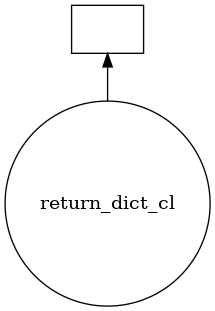

In [37]:
dask.visualize(XI_W_L.Win.Win_cl)

In [38]:
XI_W_L.Win.Win['cl'][corr_ll][bi].keys()

dict_keys(['corr', 'indxs', 'cl', 'W_pm', 'm1m2', 'xi', 'xi_b', 'M', 'M_B'])

In [39]:
dask.visualize(XI_W_L.Win.Win_cov)

AttributeError: 'window_utils' object has no attribute 'Win_cov'

In [ ]:
XI_W_L.Win.Win['cl']

In [ ]:
%time clG=XI_W_L.cl_tomo()

In [ ]:
%time cl_L=clG['stack'].compute()

In [ ]:
dask.visualize(clG['stack'])

In [ ]:
np.arange(1000,step=300)

In [ ]:
XI_W_L.Win.Win['cl'][corr_ll][bi]

In [ ]:
XI_W_L.Win.Win['cl'][corr_ll][bi]['M_B']

In [ ]:
# M2=XI_W_L.Win.Win['cov'][corr_ll+corr_ll][bi+bi]['M1324'][2].compute()
try:
    M2n=XI_W_L.Win.Win['cl'][corr_ll][bi]['M_B'].compute()
except:
    M2n=XI_W_L.Win.Win['cl'][corr_ll][bi]['M_B']
XI_W_L.SN[corr_ll][:,0,0]@M2n

In [ ]:
bi=(0,0)
f=1#XI_W_L.l**2
# plot(XI_W_L.l,f*(XI_W_L.SN[corr_ll][:,0,0]@XI_W_L.Win.Win['cov'][corr_ll+corr_ll][bi+bi]['M1324'][2]))
plot(XI_W_L.l,f*(XI_W_L.SN[corr_ll][:,0,0]@M2n))
loglog()

In [ ]:
crash

In [ ]:
XI_W_L_NW= cov_3X2(zs_bins=zs_bins,l=l0,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,zg_bins=zl_bins, #no window
                do_sample_variance=do_sample_variance,use_window=False,window_lmax=window_lmax,
                power_spectra_kwargs=power_spectra_kwargs,corrs=[corr_ll,corr_ggl,corr_gg],store_win=True,
               SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV,do_xi=True,HT=WT_L,f_sky=f_sky,
               bin_xi=bin_xi,theta_bins=th_bins)#ns=np.inf)
print('NW done')

In [ ]:
# %time clG=XI_W_L.cl_tomo()
%time clG_nw=XI_W_L_NW.cl_tomo()
#%time clH=XI_H.cl_tomo()

In [ ]:
clG['stack'].visualize()

In [ ]:
cl_L=None

In [ ]:
%time cl_L_nw=clG_nw['stack'].compute()

In [ ]:
clG['cl'].keys()

In [ ]:
XI_W_L.Win.Win_cov

In [ ]:
dask.visualize(XI_W_L.Win.Win_cov)

In [ ]:
bi=(0,0)
corr=corr_gg
cov_t=clG['cov'][corr+corr][(0,0,0,0)].compute()
cl_bt=clG['cl_b'][corr][(0,0)].compute()
cl_btnw=clG_nw['cl_b'][corr][(0,0)].compute()
cov_tnw=clG_nw['cov'][corr+corr][(0,0,0,0)].compute()

In [ ]:
plot(np.diag(cov_t['final_b']))
plot(cl_bt**2)
plot(np.diag(cov_tnw['final_b']),':')
plot(cl_btnw**2,':')
loglog()

In [ ]:
cc=XI_W_K.cov_utils
corrW=cc.corr_matrix(cov_t['final_b'])
corrW-=np.diag(np.diag(corrW))
pcolor(corrW,vmin=-.1,vmax=.1,cmap='seismic')
xticks([])
yticks([])
colorbar()
show()



In [ ]:
cc=XI_W_K.cov_utils
corrW=cc.corr_matrix(cl_L_nw['cov'])
pcolor(corrW,vmin=-1,vmax=1,cmap='seismic')
xticks([])
yticks([])
colorbar()
show()


In [ ]:
cc=XI_W_K.cov_utils
corrW=cc.corr_matrix(cl_L['cov'])
pcolor(corrW,vmin=-1,vmax=1,cmap='seismic')
# xlabel(r'$\theta$ (degrees)')
# ylabel(r'$\theta$ (degrees)')
title('Wigner')
# hlines(60,0,120)
# vlines(60,0,120)
xticks([])
yticks([])


colorbar()
show()
# corrL=cc.corr_matrix(clL['cov'])
# pcolor(corrL,vmin=-1,vmax=1,cmap='seismic')

In [ ]:
linalg.cond(cl_L['cov']) #< 1/sys.float_info.epsilon

In [ ]:
N=np.linalg.norm(cl_L['cov'])
np.linalg.det(cl_L['cov']*5.e20)

In [ ]:
cov_inv=np.linalg.inv(cl_L['cov'])
cov_nw_inv=np.linalg.inv(cl_L_nw['cov'])
SN=cl_L['cl_b']@cov_inv@cl_L['cl_b']
SN_nw=cl_L_nw['cl_b']@cov_nw_inv@cl_L_nw['cl_b']
SN,SN_nw,SN/SN_nw

In [ ]:
crash

In [ ]:
%time xiW_L=xiWG_L['stack'].compute()
%time xiW_L_nw=xiWG_L_nw['stack'].compute()

In [ ]:
clG['cl_b'].keys()

In [ ]:
XI_W_L.corrs

In [ ]:
XI_W_L.Win.Win.keys()

In [ ]:
f=1
xiW_L_nw_inv=np.linalg.inv(xiW_L_nw['cov']*f)
print ((np.dot(xiW_L_nw['xi'],np.dot(xiW_L_nw_inv,xiW_L_nw['xi']))))

cov_xiWL_inv=np.linalg.inv(xiW_L['cov']*f)
print ((np.dot(xiW_L['xi'],np.dot(cov_xiWL_inv,xiW_L['xi']))))

In [ ]:
pcolor(xiW_L_nw['cov']/xiW_L['cov'])
colorbar()

In [ ]:
pcolor(xiW_L_nw_inv/cov_xiWL_inv)
colorbar()

In [ ]:
cc=XI_W_L.cov_utils
corrW=cc.corr_matrix(cl_L['cov'])
pcolor(corrW,vmin=-1,vmax=1,cmap='seismic')
# xlabel(r'$\theta$ (degrees)')
# ylabel(r'$\theta$ (degrees)')
title('$C_\ell$')
# hlines(60,0,120)
# vlines(60,0,120)
xticks([])
yticks([])


colorbar()
show()
# corrL=cc.corr_matrix(clL['cov'])
# pcolor(corrL,vmin=-1,vmax=1,cmap='seismic')

In [ ]:
cc=XI_W_L.cov_utils
corrW=cc.corr_matrix(cl_L_nw['cov'])
pcolor(corrW,vmin=-1,vmax=1,cmap='seismic')
# xlabel(r'$\theta$ (degrees)')
# ylabel(r'$\theta$ (degrees)')
title('$C_\ell$-NW')
# hlines(60,0,120)
# vlines(60,0,120)
xticks([])
yticks([])


colorbar()
show()
# corrL=cc.corr_matrix(clL['cov'])
# pcolor(corrL,vmin=-1,vmax=1,cmap='seismic')

In [ ]:
R=np.diag(cl_L_nw['cov']/cl_L['cov'])
plot(R)

In [ ]:
cc=XI_W_L.cov_utils
corrW=cc.corr_matrix(xiW_L['cov'])
pcolor(corrW,vmin=-1,vmax=1,cmap='seismic')
# xlabel(r'$\theta$ (degrees)')
# ylabel(r'$\theta$ (degrees)')
title('Wigner')
# hlines(60,0,120)
# vlines(60,0,120)
xticks([])
yticks([])


colorbar()
show()
# corrL=cc.corr_matrix(clL['cov'])
# pcolor(corrL,vmin=-1,vmax=1,cmap='seismic')

In [ ]:
cc=XI_W_L.cov_utils
corrNW=cc.corr_matrix(xiW_L_nw['cov'])
pcolor(corrNW,vmin=-1,vmax=1,cmap='seismic')
# xlabel(r'$\theta$ (degrees)')
# ylabel(r'$\theta$ (degrees)')
title('Wigner')
# hlines(60,0,120)
# vlines(60,0,120)
xticks([])
yticks([])


colorbar()
show()
# corrL=cc.corr_matrix(clL['cov'])
# pcolor(corrL,vmin=-1,vmax=1,cmap='seismic')

In [ ]:
pcolor(corrW/corrNW-1,vmin=-1,vmax=1,cmap='seismic')
# xlabel(r'$\theta$ (degrees)')
# ylabel(r'$\theta$ (degrees)')
title('Wigner')
# hlines(60,0,120)
# vlines(60,0,120)
xticks([])
yticks([])


colorbar()
show()
# corrL=cc.corr_matrix(clL['cov'])
# pcolor(corrL,vmin=-1,vmax=1,cmap='seismic')

In [ ]:
XI_W_L.cov_utils.gaussian_cov_norm_2D

In [ ]:
np.diag(xiW_L_nw['cov'])/np.diag(xiW_L['cov'])

In [ ]:
5.25/1.93

In [ ]:
x=np.array([1,0.5,0.1,0.3,0.7])
plot(x,[1,1.93,5.25,2.85,1.37],'bo')
plot(x,1./x,'ro')
yscale('log')
xscale('log')

In [ ]:
xiW_L_nw['cov']/xiW_L['cov']

In [ ]:
xiW_L_nw['xi']/xiW_L['xi']